In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install japanize-matplotlib
import japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 7.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=8f8961c756ed1d51c6f42e517957fab8294b400ad9155b55ab5f7a9875502d3e
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
# ニュー資金別貸借対照表
df = pd.read_csv("/content/drive/MyDrive/Purchased_products/NewBS.csv", encoding="cp932")

In [ ]:
df.shape

(25, 18)

In [ ]:
df.columns

Index(['年度', '企業名', '現金', '売掛金', '棚卸資産', '流動資産', '固定資産', '買掛金', '短期借入金',
       '長期借入金', '負債', '資本金', '資本剰余金', '純資産', '売上', '営業利益', '経常利益', '純利益'],
      dtype='object')

In [ ]:
df.head()

,年度,企業名,現金,売掛金,棚卸資産,流動資産,固定資産,買掛金,短期借入金,長期借入金,負債,資本金,資本剰余金,純資産,売上,営業利益,経常利益,純利益
0,2007,松風,3525,2758,2966,11326,10026,633,1020,0,4389,4474,4576,16963,15212,1468,1513,910
1,2008,松風,4694,2490,2607,11191,9752,540,1020,0,4332,4474,4576,16612,16526,1414,1313,793
2,2009,松風,6430,2444,3303,12989,9533,666,1020,0,4212,4474,4576,18310,16040,1056,951,521
3,2010,松風,6625,2576,3276,13464,9184,687,1000,0,4415,4474,4576,18233,15771,942,758,455
4,2011,松風,7286,2526,3327,13966,8829,463,990,0,4355,4474,4576,18439,15985,997,962,510


In [ ]:
# 調達
procu_dict = {}
for i in range(len(df)):
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 0, 1] = df.iloc[i]["純資産"] - \
                                                              (df.iloc[i]["資本金"] + df.iloc[i]["資本剰余金"])    # 損益資金
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 1, 1] = df.iloc[i]["買掛金"] - df.iloc[i]["売掛金"]       # サイト
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 2, 1] = df.iloc[i]["棚卸資産"] * (-1)                     # 棚卸資産
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 3, 1] = df.iloc[i]["資本金"] + df.iloc[i]["資本剰余金"]   # 資本金
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 4, 1] = df.iloc[i]["固定資産"] * (-1)                     # 固定資産
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 5, 1] = 0                                                 # オーナー残存
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 6, 1] = df.iloc[i]["長期借入金"]                          # 長期借入金
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 7, 1] = df.iloc[i]["短期借入金"]                          # 短期借入金
    sisan_kei = df.iloc[i]["流動資産"] - (df.iloc[i]["売掛金"] + df.iloc[i]["棚卸資産"] + df.iloc[i]["現金"])
    fusai_kei = df.iloc[i]["負債"] - (df.iloc[i]["買掛金"] + df.iloc[i]["長期借入金"] + df.iloc[i]["短期借入金"])
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 8, 1] = fusai_kei - sisan_kei                            # 他流動資産
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 9, 1] = 0                                                # 現金
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 0, 2] = 0
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 1, 2] = 0
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 2, 2] = 0
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 3, 2] = 0
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 4, 2] = 0
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 5, 2] = 0
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 6, 2] = 0
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 7, 2] = 0
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 8, 2] = 0
    procu_dict[df.iloc[i]["年度"], df.iloc[i]["企業名"], 9, 2] = 0

In [ ]:
# 運用
for i, k in procu_dict.items():
    if i[3] != 2:
        if i[2]==0:
            temp_sum = k
        else:
            temp_sum += k
        procu_dict[i[0], i[1], i[2], 2] = temp_sum

for i, k in procu_dict.items():
    if i[3] == 1:
        if i[2] == 5 or i[2] == 9:
            procu_dict[i[0], i[1], i[2], 1] = procu_dict[i[0], i[1], i[2], 2]

In [ ]:
# Dataframe作成
def dataframe_create(procu, opera):
    df = pd.DataFrame({"item":["損益資金","サイト","棚卸資産","資本金","固定資産","オーナー残存","長期借入","短期借入","他流動資産","現預金"],
                            "procu":procu,
                            "opera":opera})
    return df

In [ ]:
def image_map(df, nendo, kigyou):
    # データフレームの各列をリスト形式の変数で受ける
    item = df['item']
    x = item.values
    y1 = df['procu']
    y1 = y1.values
    y2 = df['opera']
    y2 = y2.values

    #第一軸(ax1)と第二軸(ax2)を作ってax1 が左側の第一軸に、ax2 が右側で第二軸になります
    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()

    #y1, y2軸それぞれの範囲を設定する
    ax1.set_ylim([-25000, 31000])
    ax2.set_ylim([-25000, 31000])

    #グリッドは第一軸のみとする
    ax1.grid(True)
    ax2.grid(False)

    #第一軸が棒グラフ、第二軸が折れ線グラフで描画する
    ax1.bar(x, y1, label='運用', color="lightblue" )
    ax2.plot(x, y2, linewidth=2, color='orange', linestyle='solid', marker='o', markersize=8, label='調達')

    #タイトル、軸ラベル、凡例の表示、ｘ軸のラベル(month)は70度傾ける
    # ax1.set_title(kigyou, nendo, pad=8, fontsize=20, color='blue')
    ax1.set_title(str(nendo) + "年度　資金別B/S" + kigyou + "連結")
    ax1.set_ylabel('運用')
    ax2.set_ylabel('調達')
    # ax1.set_xlabel('Month')
    ax1.tick_params(axis='x', rotation=40)
    ax1.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.5, fontsize=10)
    ax2.legend(bbox_to_anchor=(0, 0.95), loc='upper left', borderaxespad=0.5, fontsize=10)

    plt.show()

    display(df.T)

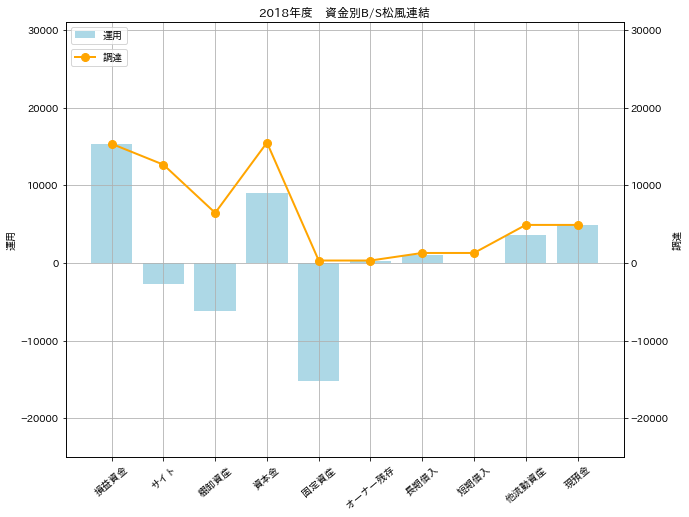

,0,1,2,3,4,5,6,7,8,9
item,損益資金,サイト,棚卸資産,資本金,固定資産,オーナー残存,長期借入,短期借入,他流動資産,現預金
procu,15333,-2685,-6207,9050,-15186,305,974,0,3611,4890
opera,15333,12648,6441,15491,305,305,1279,1279,4890,4890


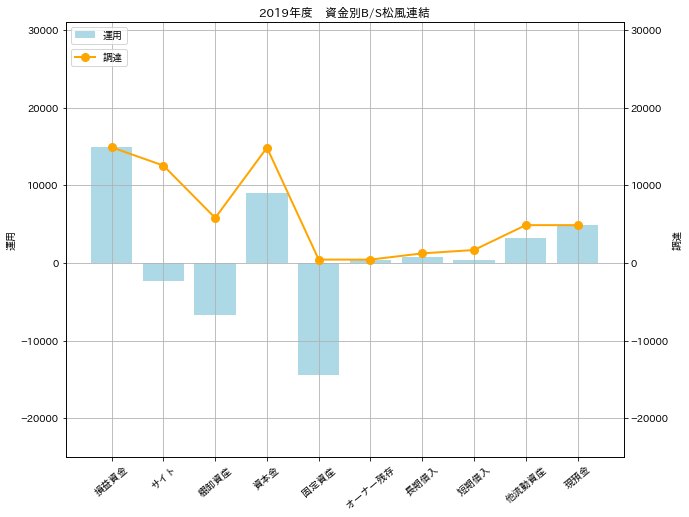

,0,1,2,3,4,5,6,7,8,9
item,損益資金,サイト,棚卸資産,資本金,固定資産,オーナー残存,長期借入,短期借入,他流動資産,現預金
procu,14886,-2356,-6739,9050,-14417,424,803,433,3202,4862
opera,14886,12530,5791,14841,424,424,1227,1660,4862,4862


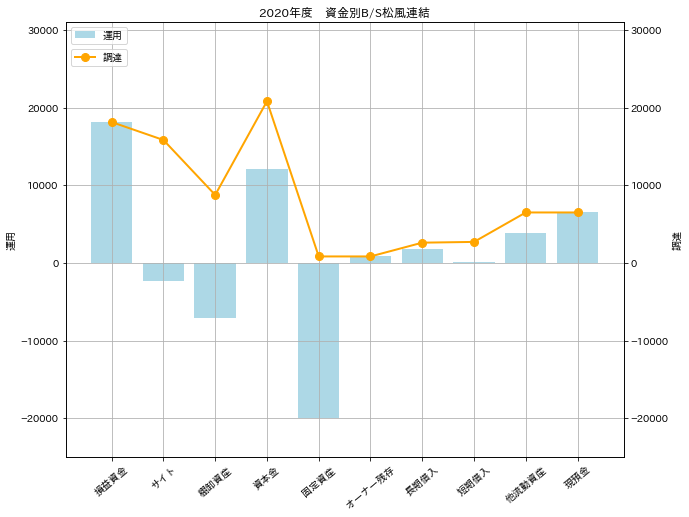

,0,1,2,3,4,5,6,7,8,9
item,損益資金,サイト,棚卸資産,資本金,固定資産,オーナー残存,長期借入,短期借入,他流動資産,現預金
procu,18133,-2307,-7077,12065,-19983,831,1774,98,3791,6494
opera,18133,15826,8749,20814,831,831,2605,2703,6494,6494


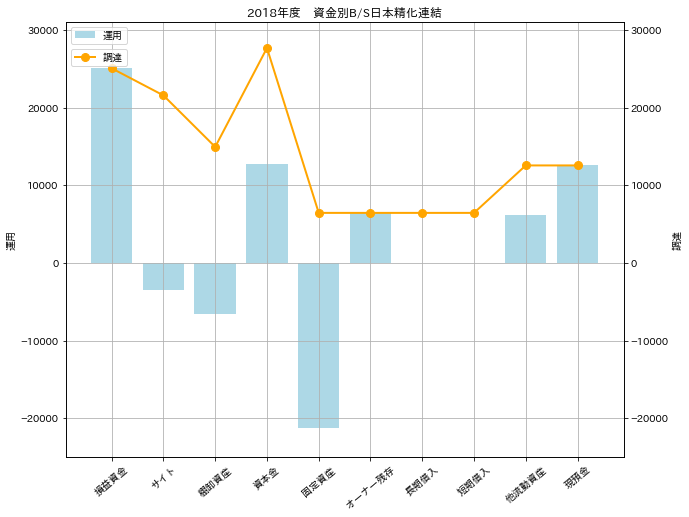

,0,1,2,3,4,5,6,7,8,9
item,損益資金,サイト,棚卸資産,資本金,固定資産,オーナー残存,長期借入,短期借入,他流動資産,現預金
procu,25059,-3491,-6633,12736,-21231,6440,0,0,6111,12551
opera,25059,21568,14935,27671,6440,6440,6440,6440,12551,12551


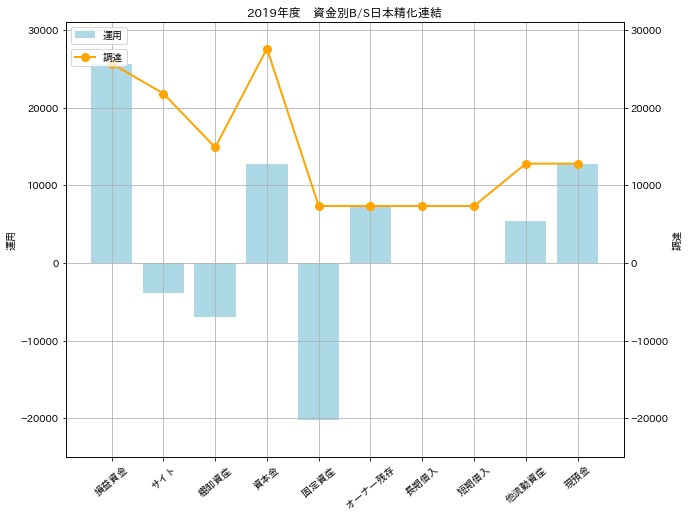

,0,1,2,3,4,5,6,7,8,9
item,損益資金,サイト,棚卸資産,資本金,固定資産,オーナー残存,長期借入,短期借入,他流動資産,現預金
procu,25663,-3852,-6946,12736,-20275,7326,0,0,5452,12778
opera,25663,21811,14865,27601,7326,7326,7326,7326,12778,12778


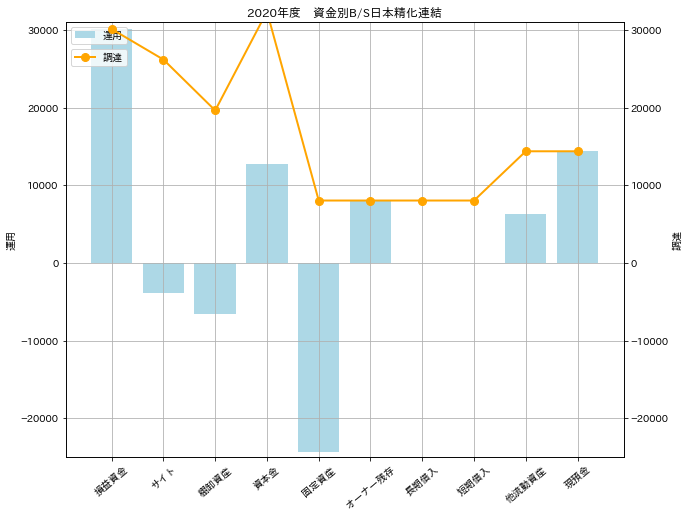

,0,1,2,3,4,5,6,7,8,9
item,損益資金,サイト,棚卸資産,資本金,固定資産,オーナー残存,長期借入,短期借入,他流動資産,現預金
procu,30110,-3929,-6550,12736,-24336,8031,0,0,6342,14373
opera,30110,26181,19631,32367,8031,8031,8031,8031,14373,14373


In [ ]:
# 画像作成
# 年度指定
start_nendo = 2018
end_nendo = 2020
first_flg = True
for i, k in procu_dict.items():
    if i[0] >= start_nendo and i[0] <= end_nendo:
        if first_flg:        
            procu_keys = (i[0], i[1])
            procu_list = []
            opera_list = []
            first_flg = False
        if (i[0], i[1]) != procu_keys:
            df = dataframe_create(procu_list, opera_list)
            image_map(df, procu_keys[0], procu_keys[1])
            procu_keys = (i[0], i[1])
            procu_list = []
            opera_list = []
        if i[3] == 1:
            procu_list.append(k)
        else:
            opera_list.append(k)

df = dataframe_create(procu_list, opera_list)
image_map(df, procu_keys[0], procu_keys[1])